### A Deep Dive into Generating Shakespearean Text

This project harnesses the power of deep learning to generate text that mimics the distinctive style of William Shakespeare. At its core, it's a language model built with PyTorch that learns the patterns, vocabulary, and grammatical structures from a collection of Shakespeare's works. The model then uses this learned knowledge to predict subsequent words and generate new, original text that sounds authentically Shakespearean.

#### Data Preparation: Setting the Stage

Before the model can learn, the raw text from Shakespeare's writings is meticulously prepared. This involves several key steps:

*   **Tokenization and Vocabulary Creation:** The entire body of text is broken down into individual words, or "tokens." A comprehensive vocabulary is then built, cataloging every unique word used by Shakespeare in the provided text.

*   **Numerical Representation:** Since machine learning models work with numbers, not words, each unique word in the vocabulary is assigned a specific integer. Two dictionaries are created for this purpose: `stoi` (string-to-integer) for converting words to their numerical counterparts and `itos` (integer-to-string) for reversing the process.

*   **Creating a Context for Learning:** The model learns by predicting the next word based on a sequence of preceding words. This is where the "context window" comes into play. A fixed-size window of preceding words (the context) is used as the input, and the word that immediately follows is the target for the model to predict. This process is repeated for every word in the text, creating a comprehensive dataset of input-output pairs.

*   **Efficient Data Handling with PyTorch:** To manage this data efficiently during training, PyTorch's `Dataset` and `DataLoader` classes are utilized. The `Dataset` class organizes the input-output pairs, while the `DataLoader` groups them into batches, shuffles the data to prevent the model from learning the order of the text, and loads it for training.

#### The Model Architecture: The "ShekaspearLSTM"

The heart of this project is a Long Short-Term Memory (LSTM) network, a type of recurrent neural network (RNN) particularly well-suited for learning from sequential data like text. The custom-named `ShekaspearLSTM` model is composed of three main layers:

*   **Embedding Layer:** This layer transforms the numerical representation of each word into a dense vector of a fixed size. This is a crucial step as it allows the model to capture the semantic relationships between words. Words with similar meanings will have similar vector representations.

*   **LSTM Layer:** This is the core of the model where the learning happens. The LSTM layer processes the sequence of word embeddings, capturing the long-range dependencies and patterns within the text. This is what enables the model to understand the grammatical structure and stylistic nuances of Shakespeare's writing.

*   **Linear Layer (Fully Connected Layer):** The output from the LSTM layer is fed into a final linear layer. This layer produces a score for every word in the vocabulary, representing the model's prediction for the next word in the sequence.

#### Training the Model: Teaching the Quill to Write

The training process involves showing the model the prepared data repeatedly, allowing it to adjust its internal parameters to make increasingly accurate predictions.

*   **Loss Function:** The `cross-entropy` loss function is used to measure the difference between the model's predictions and the actual next word in the text. A lower loss value indicates that the model's predictions are closer to the reality of Shakespeare's writing.

*   **Optimizer:** The `Adam` optimizer is employed to update the model's parameters in a way that minimizes the loss function. It's an efficient and popular choice for training deep learning models.

*   **Epochs and Iterations:** The model is trained for a set number of "epochs," where each epoch represents one full pass through the entire dataset. Within each epoch, the data is processed in batches, and for each batch, the model's predictions are compared to the actual words, the loss is calculated, and the optimizer updates the model's parameters.

#### Generating New Text: The Fruits of Labor

Once the model is trained, it can be used to generate new text that captures the essence of Shakespeare's style.

*   **Seeding the Generation:** The process begins with a "seed" of a few starting words provided by the user.

*   **Predicting the Next Word:** The model takes this initial context and predicts the probability of every word in the vocabulary being the next word.

*   **Introducing Creativity with Temperature:** The `temperature` parameter plays a crucial role in controlling the randomness of the generated text. A lower temperature makes the model more confident and likely to choose the most probable next word, resulting in more predictable text. A higher temperature increases the chances of selecting less likely words, leading to more creative and sometimes surprising outputs.

*   **Softmax and Multinomial Sampling:** The `softmax` function converts the model's output scores into a probability distribution. Then, `torch.multinomial` is used to sample the next word from this distribution, allowing for a degree of randomness guided by the model's learned probabilities.

*   **Iterative Generation:** The newly generated word is then added to the context, and the process repeats, with the model generating one word at a time until the desired length of text is reached.


In [26]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [27]:
clean_text = text.replace('\n', ' ')
clean_text = clean_text.lower()
words = clean_text.split()
len(words)

202651

In [28]:
vocab = sorted(set(words))

In [29]:
vocab

['&c.',
 '&c:',
 "'",
 "'?",
 "'a",
 "'aged",
 "'alas,",
 "'alas,'",
 "'all",
 "'alla",
 "'almost",
 "'an",
 "'ay",
 "'ay'",
 "'ay,",
 "'ay,'",
 "'ay.'",
 "'banished'",
 "'banished'?",
 "'banished,'",
 "'banishment.'",
 "'be",
 "'beseech",
 "'better:'",
 "'bless",
 "'bout",
 "'bove",
 "'broad;'",
 "'brutus!'",
 "'by",
 "'celsa",
 "'cerns",
 "'charge",
 "'charge!",
 "'citizens!'",
 "'clarence",
 "'come",
 "'come,",
 "'commend",
 "'con",
 "'content'",
 "'coriolanus!'",
 "'courage!'",
 "'courage,",
 "'cucullus",
 "'cum",
 "'dear",
 "'death.'",
 "'death;'",
 "'deny",
 "'do",
 "'dost",
 "'dove;'",
 "'em",
 "'em!",
 "'em,",
 "'em.",
 "'em:",
 "'em;",
 "'ever'",
 "'fair",
 "'faith,",
 "'farewell'",
 "'farewell:'",
 "'fine;'",
 "'flayed",
 "'for",
 "'fore",
 "'forgive",
 "'frets,",
 "'g'",
 "'gainst",
 "'girdling",
 "'go",
 "'god",
 "'good",
 "'good'",
 "'grace.'",
 "'greed",
 "'have",
 "'havior",
 "'he",
 "'head",
 "'heart's",
 "'hell",
 "'her",
 "'hic",
 "'hold,",
 "'honour'",
 "'i",
 "'i'",

In [30]:
len(vocab)

23641

In [31]:
stoi = {i:j+1 for j,i in enumerate(vocab)}

In [32]:
stoi

{'&c.': 1,
 '&c:': 2,
 "'": 3,
 "'?": 4,
 "'a": 5,
 "'aged": 6,
 "'alas,": 7,
 "'alas,'": 8,
 "'all": 9,
 "'alla": 10,
 "'almost": 11,
 "'an": 12,
 "'ay": 13,
 "'ay'": 14,
 "'ay,": 15,
 "'ay,'": 16,
 "'ay.'": 17,
 "'banished'": 18,
 "'banished'?": 19,
 "'banished,'": 20,
 "'banishment.'": 21,
 "'be": 22,
 "'beseech": 23,
 "'better:'": 24,
 "'bless": 25,
 "'bout": 26,
 "'bove": 27,
 "'broad;'": 28,
 "'brutus!'": 29,
 "'by": 30,
 "'celsa": 31,
 "'cerns": 32,
 "'charge": 33,
 "'charge!": 34,
 "'citizens!'": 35,
 "'clarence": 36,
 "'come": 37,
 "'come,": 38,
 "'commend": 39,
 "'con": 40,
 "'content'": 41,
 "'coriolanus!'": 42,
 "'courage!'": 43,
 "'courage,": 44,
 "'cucullus": 45,
 "'cum": 46,
 "'dear": 47,
 "'death.'": 48,
 "'death;'": 49,
 "'deny": 50,
 "'do": 51,
 "'dost": 52,
 "'dove;'": 53,
 "'em": 54,
 "'em!": 55,
 "'em,": 56,
 "'em.": 57,
 "'em:": 58,
 "'em;": 59,
 "'ever'": 60,
 "'fair": 61,
 "'faith,": 62,
 "'farewell'": 63,
 "'farewell:'": 64,
 "'fine;'": 65,
 "'flayed": 66,
 "'f

In [33]:
itos = {i+1:j for i,j in enumerate(vocab)}

In [34]:
itos

{1: '&c.',
 2: '&c:',
 3: "'",
 4: "'?",
 5: "'a",
 6: "'aged",
 7: "'alas,",
 8: "'alas,'",
 9: "'all",
 10: "'alla",
 11: "'almost",
 12: "'an",
 13: "'ay",
 14: "'ay'",
 15: "'ay,",
 16: "'ay,'",
 17: "'ay.'",
 18: "'banished'",
 19: "'banished'?",
 20: "'banished,'",
 21: "'banishment.'",
 22: "'be",
 23: "'beseech",
 24: "'better:'",
 25: "'bless",
 26: "'bout",
 27: "'bove",
 28: "'broad;'",
 29: "'brutus!'",
 30: "'by",
 31: "'celsa",
 32: "'cerns",
 33: "'charge",
 34: "'charge!",
 35: "'citizens!'",
 36: "'clarence",
 37: "'come",
 38: "'come,",
 39: "'commend",
 40: "'con",
 41: "'content'",
 42: "'coriolanus!'",
 43: "'courage!'",
 44: "'courage,",
 45: "'cucullus",
 46: "'cum",
 47: "'dear",
 48: "'death.'",
 49: "'death;'",
 50: "'deny",
 51: "'do",
 52: "'dost",
 53: "'dove;'",
 54: "'em",
 55: "'em!",
 56: "'em,",
 57: "'em.",
 58: "'em:",
 59: "'em;",
 60: "'ever'",
 61: "'fair",
 62: "'faith,",
 63: "'farewell'",
 64: "'farewell:'",
 65: "'fine;'",
 66: "'flayed",
 67:

In [35]:
stoi['it']

10906

In [36]:
itos[0] = 'start'
stoi['start'] = 0


In [37]:
itos[0]

'start'

In [38]:
x = []
y =[]
context_window = 5
context = [0] * context_window

for word in words:
    ix = stoi[word]
    x.append(context)
    y.append(ix)
    context = context[1:] + [ ix]
    

In [39]:
len(x)
len(y)

202651

In [40]:
x[:10], y[:10]

([[0, 0, 0, 0, 0],
  [0, 0, 0, 0, 7729],
  [0, 0, 0, 7729, 3782],
  [0, 0, 7729, 3782, 1948],
  [0, 7729, 3782, 1948, 22539],
  [7729, 3782, 1948, 22539, 15859],
  [3782, 1948, 22539, 15859, 1093],
  [1948, 22539, 15859, 1093, 8452],
  [22539, 15859, 1093, 8452, 9602],
  [15859, 1093, 8452, 9602, 12757]],
 [7729, 3782, 1948, 22539, 15859, 1093, 8452, 9602, 12757, 18975])

In [41]:
import torch
x = torch.tensor(x)
y = torch.tensor(y)
x.shape, y.shape

(torch.Size([202651, 5]), torch.Size([202651]))

In [42]:
x[2]

tensor([   0,    0,    0, 7729, 3782])

In [81]:
y[2]

tensor(1948)

In [196]:
from torch.utils.data import Dataset, DataLoader

class TinyDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)

    def __getitem__(self,idx):
        return self.x[idx], self.y[idx]

dataset = TinyDataset(x,y)
dataloader = DataLoader(dataset, batch_size = 1024, shuffle = True)
  

In [197]:
feature, label = next(iter(dataloader))
feature.shape, label.shape

(torch.Size([1024, 5]), torch.Size([1024]))

In [177]:
feature.shape

torch.Size([256, 5])

In [178]:
import torch.nn as nn

class ShekaspearLSTM(nn.Module):
    def __init__(self,vocab_size, embed_dim, hidden_size, output_dim, num_layers=1):
        super(ShekaspearLSTM,self).__init__()
        self.embedding = nn.Embedding( vocab_size, embed_dim )
        self.lstm = nn.LSTM(embed_dim, hidden_size, batch_first = True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self,x):
        # print (x.shape)
        x = self.embedding(x)
        # print (x.shape)
        out,(hidden_st,cell_st) = self.lstm(x)
        # print (out.shape, hidden_st.shape, cell_st.shape)
        out = self.fc(out)
        # print (out.shape, hidden_st.shape)
        return out
        

In [198]:
torch.manual_seed(42)
MyModel = ShekaspearLSTM(len(vocab)+1, 8, 16, len(vocab))

In [199]:
feature, label = next(iter(dataloader))
feature, label.shape

(tensor([[ 1908, 20359, 23201, 20359, 12964],
         [11593, 20359, 20615,  5249,  1903],
         [21840, 20727,  6123, 20598,  6954],
         ...,
         [ 2892,  5170,   987,  3095, 20359],
         [22954, 23604,  8942,  9523,  6136],
         [ 8826, 11426,  5229,  1221, 23566]]),
 torch.Size([1024]))

In [190]:
a = MyModel(feature)
a.shape

torch.Size([256, 5, 23642])

In [191]:
a.shape

torch.Size([256, 5, 23642])

In [200]:
MyModel.train()
optimizer = torch.optim.Adam(MyModel.parameters(), lr = 0.001)
criterion = F.cross_entropy

lossi = []
stepi = []
counter = 0

for epoch in range(3):
    for feature, label in dataloader:
        predict = MyModel(feature)   
        predict = predict[:, -1, :]
        label = label.reshape(-1)                       
        loss = criterion(predict, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
        stepi.append(counter)
        counter += 1
        if counter % 100 == 0:
            print(f"step: {counter}, loss: {loss.item():.4f}")


step: 100, loss: 8.9150
step: 200, loss: 7.2582
step: 300, loss: 7.2913
step: 400, loss: 7.2763
step: 500, loss: 7.2659


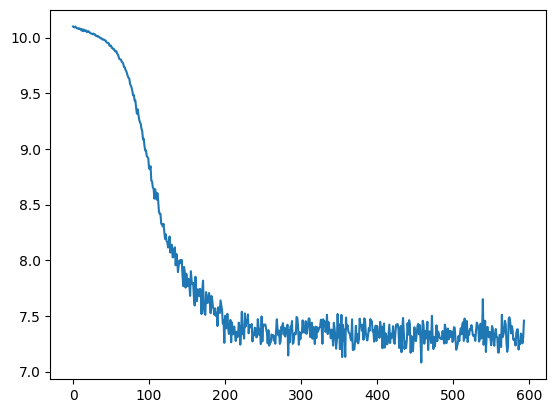

In [201]:
import matplotlib.pyplot as plt
plt.plot(stepi, lossi)

In [202]:
import torch
import torch.nn.functional as F

def generate_words(model, start_words, num_tokens=50, temperature=1.0):
    model.eval()
    context = torch.tensor([stoi[w] for w in start_words]).unsqueeze(0)  
    for _ in range(num_tokens):
        with torch.no_grad():
            output= model(context)  
            logits = output[:, -1, :]     
            # logits = logits / temperature  
            probs = F.softmax(logits, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1).item()
            context = torch.cat([context, torch.tensor([[next_token]])], dim=1)

    generated = [itos[idx] for idx in context.squeeze().tolist()]

    return " ".join(generated)


In [203]:
seed = ["i", "love"]
text = generate_words(MyModel, seed, num_tokens=30, temperature=0.8)
print(text)


i love mustard, sister unpink'd were this were for they is and storm, it sacred hangmen i me. thee. longer my a vain you a churchmen, had also, no him bid warwick,
